<a href="https://colab.research.google.com/github/hanieranjbar/snappfood_task/blob/main/UserSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High-Frequency PRO Users:
   customer_id  total_orders  total_order_value
1   CUST00002            92             120.16
3   CUST00004            87            2032.84
4   CUST00005            69            3240.20
5   CUST00006            97            3464.28
6   CUST00007            81            1658.51

Occasional PRO Users:
    customer_id  total_orders  total_order_value
10   CUST00011            51            2161.28
11   CUST00012            42            3198.70
12   CUST00013             2            4281.76
13   CUST00014             1             543.79
21   CUST00022            54             112.89

Non-PRO Users:
    customer_id  total_orders  total_order_value
0    CUST00001            97            4543.20
2    CUST00003            17            1897.69
7    CUST00008            80            2836.03
8    CUST00009            36            1026.52
14   CUST00015            88            4441.28

Low-Value PRO Users:
    customer_id  total_orders  total_order_value
1  

<ipython-input-1-c457bb605848>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(segment_sizes.keys()), y=list(segment_sizes.values()), palette="viridis")


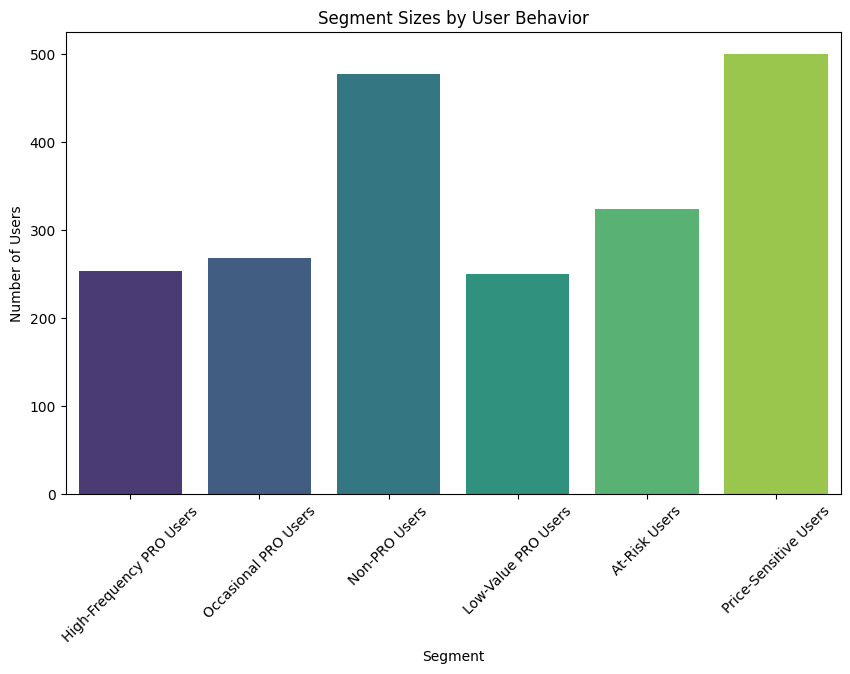

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("foodpro_users.csv")

data['subscription_start'] = pd.to_datetime(data['subscription_start'])
data['subscription_end'] = pd.to_datetime(data['subscription_end'])

data['days_since_last_order'] = (pd.to_datetime('today') - data['subscription_end']).dt.days


#  High-Frequency PRO Users
high_freq_pro = data[(data['total_pro_orders'] > data['total_pro_orders'].median()) & (data['is_pro_order'] == 1)]

#  Occasional PRO Users
occasional_pro = data[(data['total_pro_orders'] <= data['total_pro_orders'].median()) & (data['is_pro_order'] == 1)]

#  Non-PRO Users
non_pro = data[data['is_pro_order'] == 0]

#  Low-Value PRO Users
low_value_pro = data[(data['total_order_value'] <= data['total_order_value'].median()) & (data['is_pro_order'] == 1)]

#  At-Risk Users
at_risk = data[data['days_since_last_order'] > 90]

#  Price-Sensitive Users (کاربران حساس به قیمت)
price_sensitive = data[data['total_order_value'] <= data['total_order_value'].median()]

# نمایش اطلاعات سگمنت‌ها
print("High-Frequency PRO Users:\n", high_freq_pro[['customer_id', 'total_orders', 'total_order_value']].head())
print("\nOccasional PRO Users:\n", occasional_pro[['customer_id', 'total_orders', 'total_order_value']].head())
print("\nNon-PRO Users:\n", non_pro[['customer_id', 'total_orders', 'total_order_value']].head())
print("\nLow-Value PRO Users:\n", low_value_pro[['customer_id', 'total_orders', 'total_order_value']].head())
print("\nAt-Risk Users:\n", at_risk[['customer_id', 'total_orders', 'total_order_value', 'days_since_last_order']].head())
print("\nPrice-Sensitive Users:\n", price_sensitive[['customer_id', 'total_orders', 'total_order_value']].head())

segment_sizes = {
    'High-Frequency PRO Users': len(high_freq_pro),
    'Occasional PRO Users': len(occasional_pro),
    'Non-PRO Users': len(non_pro),
    'Low-Value PRO Users': len(low_value_pro),
    'At-Risk Users': len(at_risk),
    'Price-Sensitive Users': len(price_sensitive)
}

plt.figure(figsize=(10,6))
sns.barplot(x=list(segment_sizes.keys()), y=list(segment_sizes.values()), palette="viridis")
plt.title('Segment Sizes by User Behavior')
plt.xlabel('Segment')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()
